HSV color space

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

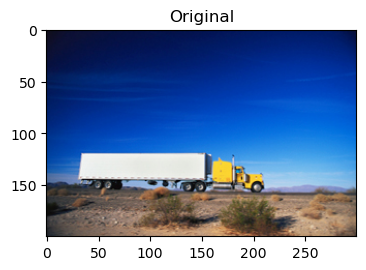

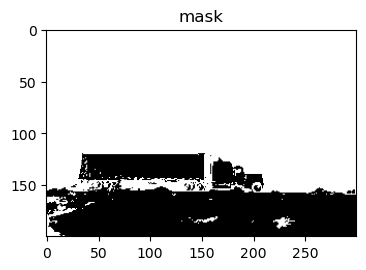

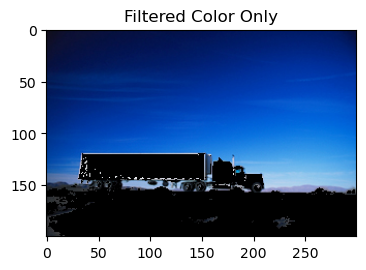

In [5]:
image = cv2.imread('images/truck.jpg')

# define range of BLUE color in HSV
lower = np.array([90,0,0])
upper = np.array([135,255,255])

# Convert image from RBG/BGR to HSV so we easily filter
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# The function compares each pixel value in the input image to the specified range and assigns a value of 255 (white) to the corresponding pixel in the output mask if the pixel value falls within the range. Pixels outside the range are assigned a value of 0 (black) in the mask.

# The resulting mask can be used to selectively extract or filter out specific regions or objects in the image based on their color or intensity.

# Use inRange to capture only the values between lower & upper 
mask = cv2.inRange(hsv_img, lower, upper)

# Perform Bitwise AND on mask and our original frame
res = cv2.bitwise_and(image, image, mask=mask)

imshow('Original', image)  
imshow('mask', mask)
imshow('Filtered Color Only', res)

filter out some colors

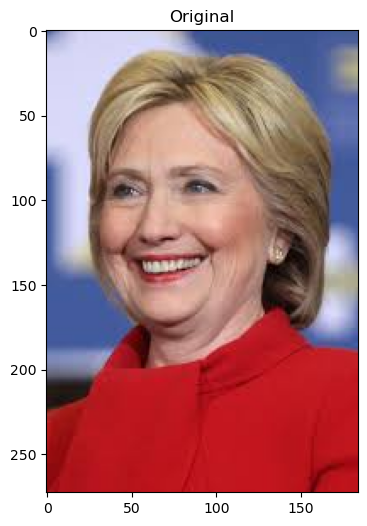

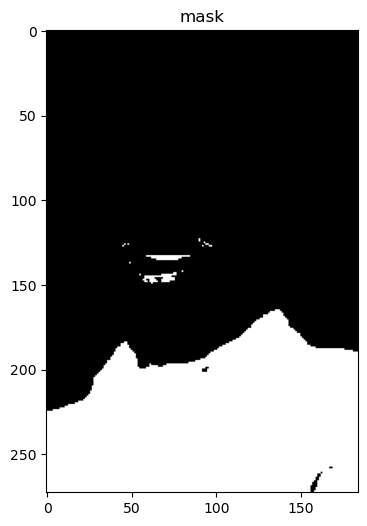

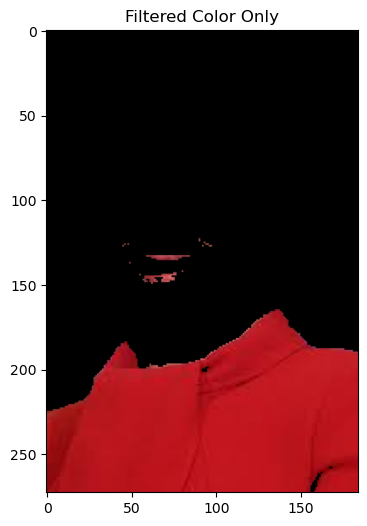

In [10]:
# image = cv2.imread("./images/Hillary.jpg")

# img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# # lower mask (0-10)
# lower_red = np.array([0,0,0])
# upper_red = np.array([60,255,255])
# mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# # upper mask (170-180)
# lower_red = np.array([190,0,0])
# upper_red = np.array([220,255,255])
# mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# # join masks
# mask = mask0+mask1

# # Perform Bitwise AND on mask and our original frame
# res = cv2.bitwise_and(image, image, mask=mask)

# imshow('Original', image)  
# imshow('mask', mask)
# imshow('Filtered Color Only', res)



# values changed so only the jacket and the lips are filtered out

import cv2
import numpy as np

image = cv2.imread("./images/Hillary.jpg")

img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0, 130, 130])  # Adjust the lower red values
upper_red = np.array([10, 255, 255])  # Adjust the upper red values
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170, 130, 130])  # Adjust the lower red values
upper_red = np.array([180, 255, 255])  # Adjust the upper red values
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join masks
mask = mask0 + mask1

# Perform Bitwise AND on mask and our original frame
res = cv2.bitwise_and(image, image, mask=mask)

imshow('Original', image)
imshow('mask', mask)
imshow('Filtered Color Only', res)
